# Preliminary

## Setup

In [1]:
!ls

FOREX Attempt1.ipynb data


In [2]:
!ls data

DEXBZUS.csv               DEXNOUS.csv               DEXUSNZ.csv
DEXCAUS.csv               DEXSDUS.csv               DEXUSUK.csv
DEXCHUS.csv               DEXSFUS.csv               DEXVZUS.csv
DEXDNUS.csv               DEXSIUS.csv               DTWEXB.csv
DEXHKUS.csv               DEXSLUS.csv               DTWEXM.csv
DEXINUS.csv               DEXSZUS.csv               DTWEXO.csv
DEXJPUS.csv               DEXTAUS.csv               README_SERIES_ID_SORT.txt
DEXKOUS.csv               DEXTHUS.csv               README_TITLE_SORT.txt
DEXMAUS.csv               DEXUSAL.csv
DEXMXUS.csv               DEXUSEU.csv


In [3]:
!head data/DEXCAUS.csv

In [4]:
baseDir = 'data/'

## Imports

In [5]:
%matplotlib inline

In [6]:
import pandas, numpy as np
import matplotlib.pyplot as plt

## Read Data

In [7]:
def readDEX(filepath):
    rawData = pandas.read_csv(filepath).replace('.', np.nan).fillna(method='ffill')
    # TODO : Parse dates
    rawData.VALUE = rawData.VALUE.astype(float)
    return rawData

In [8]:
# Read csv, remove invalid data
usCa = readDEX(baseDir + 'DEXCAUS.csv')
usCa

,DATE,VALUE
0,1971-01-04,1.0109
1,1971-01-05,1.0102
2,1971-01-06,1.0106
3,1971-01-07,1.0148
4,1971-01-08,1.0154
5,1971-01-11,1.0159
6,1971-01-12,1.0130
7,1971-01-13,1.0122
8,1971-01-14,1.0133
9,1971-01-15,1.0135


In [9]:
usCa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12435 entries, 0 to 12434
Data columns (total 2 columns):
DATE     12435 non-null object
VALUE    12435 non-null float64
dtypes: float64(1), object(1)
memory usage: 194.4+ KB


In [10]:
usCa.describe()

,VALUE
count,12435.000000
mean,1.218906
std,0.166003
min,0.916800
25%,1.064100
50%,1.205500
75%,1.344900
max,1.612800


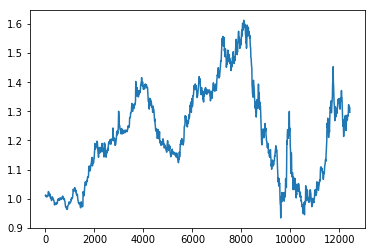

In [11]:
plt.plot(usCa['VALUE'][::10])

# Analysis : 

## A1 - Moving Average

In [12]:
def getMovingAvg(series, window):
    return series.rolling(window).mean()

In [13]:
windows = [20,50,200]
for i in windows:
    usCa['AVG'+str(i)] = getMovingAvg(usCa.VALUE, i)

In [14]:
usCa

,DATE,VALUE,AVG20,AVG50,AVG200
0,1971-01-04,1.0109,NaN,NaN,NaN
1,1971-01-05,1.0102,NaN,NaN,NaN
2,1971-01-06,1.0106,NaN,NaN,NaN
3,1971-01-07,1.0148,NaN,NaN,NaN
4,1971-01-08,1.0154,NaN,NaN,NaN
5,1971-01-11,1.0159,NaN,NaN,NaN
6,1971-01-12,1.0130,NaN,NaN,NaN
7,1971-01-13,1.0122,NaN,NaN,NaN
8,1971-01-14,1.0133,NaN,NaN,NaN
9,1971-01-15,1.0135,NaN,NaN,NaN


plt.plot(
    usCa['DATE'][-1000::10],
    usCa['VALUE'][-1000::10],
    usCa['DATE'][-1000::10],
    usCa['AVG'+str(windows[0])][-1000::10],
    usCa['DATE'][-1000::10],
    usCa['AVG'+str(windows[1])][-1000::10],
    usCa['DATE'][-1000::10],
    usCa['AVG'+str(windows[2])][-1000::10]
)

## Identifying Trends

In [17]:
usCa['UpTrend'] = usCa['AVG20'] > usCa['AVG50']

In [18]:
upIndexs = []
downIndexs = []
for ind, row in usCa.iterrows():
    if row['UpTrend'] and not usCa.iloc[ind-1]['UpTrend']:
        upIndexs.append(ind)
    elif not row['UpTrend'] and usCa.iloc[ind-1]['UpTrend']:
        downIndexs.append(ind)

In [19]:
print len(upIndexs)
print len(downIndexs)

138
138


In [20]:
zip(upIndexs, downIndexs)

[(68, 153),
 (268, 302),
 (401, 426),
 (443, 473),
 (481, 557),
 (584, 629),
 (665, 726),
 (769, 783),
 (903, 988),
 (1007, 1173),
 (1177, 1224),
 (1305, 1314),
 (1457, 1489),
 (1532, 1579),
 (1591, 1652),
 (1677, 1760),
 (1763, 1813),
 (1845, 1919),
 (1954, 2052),
 (2077, 2135),
 (2189, 2226),
 (2245, 2268),
 (2292, 2328),
 (2403, 2445),
 (2499, 2617),
 (2640, 2665),
 (2694, 2744),
 (2751, 2784),
 (2825, 2833),
 (2873, 3019),
 (3110, 3140),
 (3196, 3222),
 (3241, 3266),
 (3279, 3308),
 (3350, 3417),
 (3431, 3551),
 (3581, 3617),
 (3631, 3726),
 (3750, 3776),
 (3821, 3866),
 (3876, 3954),
 (4031, 4053),
 (4074, 4104),
 (4111, 4113),
 (4129, 4141),
 (4259, 4300),
 (4337, 4339),
 (4394, 4417),
 (4539, 4549),
 (4597, 4631),
 (4662, 4676),
 (4741, 4768),
 (4799, 4830),
 (4882, 4898),
 (4972, 5012),
 (5056, 5085),
 (5141, 5202),
 (5245, 5254),
 (5278, 5294),
 (5360, 5385),
 (5453, 5554),
 (5572, 5605),
 (5652, 5745),
 (5753, 5767),
 (5812, 5957),
 (5980, 6010),
 (6031, 6106),
 (6118, 6146),

In [21]:
zip(downIndexs[:-1], upIndexs[1:])

[(153, 268),
 (302, 401),
 (426, 443),
 (473, 481),
 (557, 584),
 (629, 665),
 (726, 769),
 (783, 903),
 (988, 1007),
 (1173, 1177),
 (1224, 1305),
 (1314, 1457),
 (1489, 1532),
 (1579, 1591),
 (1652, 1677),
 (1760, 1763),
 (1813, 1845),
 (1919, 1954),
 (2052, 2077),
 (2135, 2189),
 (2226, 2245),
 (2268, 2292),
 (2328, 2403),
 (2445, 2499),
 (2617, 2640),
 (2665, 2694),
 (2744, 2751),
 (2784, 2825),
 (2833, 2873),
 (3019, 3110),
 (3140, 3196),
 (3222, 3241),
 (3266, 3279),
 (3308, 3350),
 (3417, 3431),
 (3551, 3581),
 (3617, 3631),
 (3726, 3750),
 (3776, 3821),
 (3866, 3876),
 (3954, 4031),
 (4053, 4074),
 (4104, 4111),
 (4113, 4129),
 (4141, 4259),
 (4300, 4337),
 (4339, 4394),
 (4417, 4539),
 (4549, 4597),
 (4631, 4662),
 (4676, 4741),
 (4768, 4799),
 (4830, 4882),
 (4898, 4972),
 (5012, 5056),
 (5085, 5141),
 (5202, 5245),
 (5254, 5278),
 (5294, 5360),
 (5385, 5453),
 (5554, 5572),
 (5605, 5652),
 (5745, 5753),
 (5767, 5812),
 (5957, 5980),
 (6010, 6031),
 (6106, 6118),
 (6146, 6222

## Place Trades

In [22]:
trades = map(lambda (upInd, downInd) : usCa.iloc[upInd]['VALUE']-usCa.iloc[downInd]['VALUE'], np.array(zip(upIndexs, downIndexs)))

In [23]:
trades = map(lambda (upInd, downInd) : usCa.iloc[upInd]['VALUE']-usCa.iloc[downInd]['VALUE'], np.array(zip(downIndexs[:-1], upIndexs[1:])))

In [24]:
print "Percentage Increase : "
np.sum(trades) / np.average(usCa.VALUE)

Percentage Increase : 


0.039215479292000394

## Automate Moving Average Strategy

In [32]:
def getValueChanges(series):
    upIndexs = []
    downIndexs = []
    for ind, val in enumerate(series):
        if ind==0:
            continue
        if val > series[ind-1]:
            upIndexs.append(ind)
        elif val < series[ind-1]:
             downIndexs.append(ind)
    return upIndexs, downIndexs

In [30]:
def movingAverageTrades(df, shorter=20, longer=50):
    # where is smaller window > longer window
    isAboveAvg = getMovingAvg(df.VALUE, shorter) > getMovingAvg(df.VALUE, longer)
    # get indexes of where shorter window crosses longer window
    buyInd, sellInd = getValueChanges(isAboveAvg)
    return zip(buyInd, sellInd)

## Evaluate Strategy

In [28]:
def makeCash(df, positions):
    tradeValues = map(lambda (upInd, downInd) : df.iloc[upInd]['VALUE']-df.iloc[downInd]['VALUE'], positions)
    return np.sum(tradeValues)

In [40]:
makeCash(usCa, movingAverageTrades(usCa, 10, 20))

-0.3381999999999995